<font size="5">Stable Diffusion Inference </font> 
<br>
This notebook performs the following steps:<br>
* How to generate novel images based on a text prompt using the KerasCV implementation <br>
* Enable FP16 precision for faster inference <br>
* Use of ITEX[GPU] <br>

In [1]:
import time
from keras_cv.models.stable_diffusion import StableDiffusion
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

2023-04-28 12:41:11.411045: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-28 12:41:11.566157: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-28 12:41:11.570931: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/intel/oneapi/vpl/2023.0.0/lib:/opt/intel/oneapi/tbb/2021.9.0/env/../lib/intel6

You do not have pycocotools installed, so KerasCV pycoco metrics are not available. Please run `pip install pycocotools`.
You do not have pyococotools installed, so the `PyCOCOCallback` API is not available.


/home/nazneen/.conda/envs/kerascv-patch/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def plot_images(images):
    png_name = "{}_{}imgs_{}steps.png".format(
        precision, batch_size, num_steps)
    
    print("Start plotting the generated images to %s" % (png_name))
    plt.figure(figsize=(20, 20))
    for i in range(len(images)):
        ax = plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])
        plt.axis("off")

<font size ="4">First, we construct a model and define few of the required parameters:</font>

In [3]:
iterations = 2
use_xla = False
precision = 'fp32'
batch_size = 1
num_steps = 50
benchmark_result = []

model = StableDiffusion(
    img_width=512,
    img_height=512,
    jit_compile=use_xla,
    precision=precision,
)

By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE


<font size ="4">Next, we give it a prompt: </font>

Start Warmup


2023-04-28 12:42:12.196251: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-28 12:42:12.198569: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform XPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-04-28 12:42:12.198592: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform XPU ID 1, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-04-28 12:42:12.198705: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


2023-04-28 12:42:37.122238: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type XPU is enabled.


50/50 [==============================] - 65s 488ms/step


2023-04-28 12:43:26.771567: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type XPU is enabled.


Start running inference and generating images
50/50 [==============================] - 25s 492ms/step
Standard FP32 precision: 25.79 seconds
Start plotting the generated images to fp32_1imgs_50steps.png


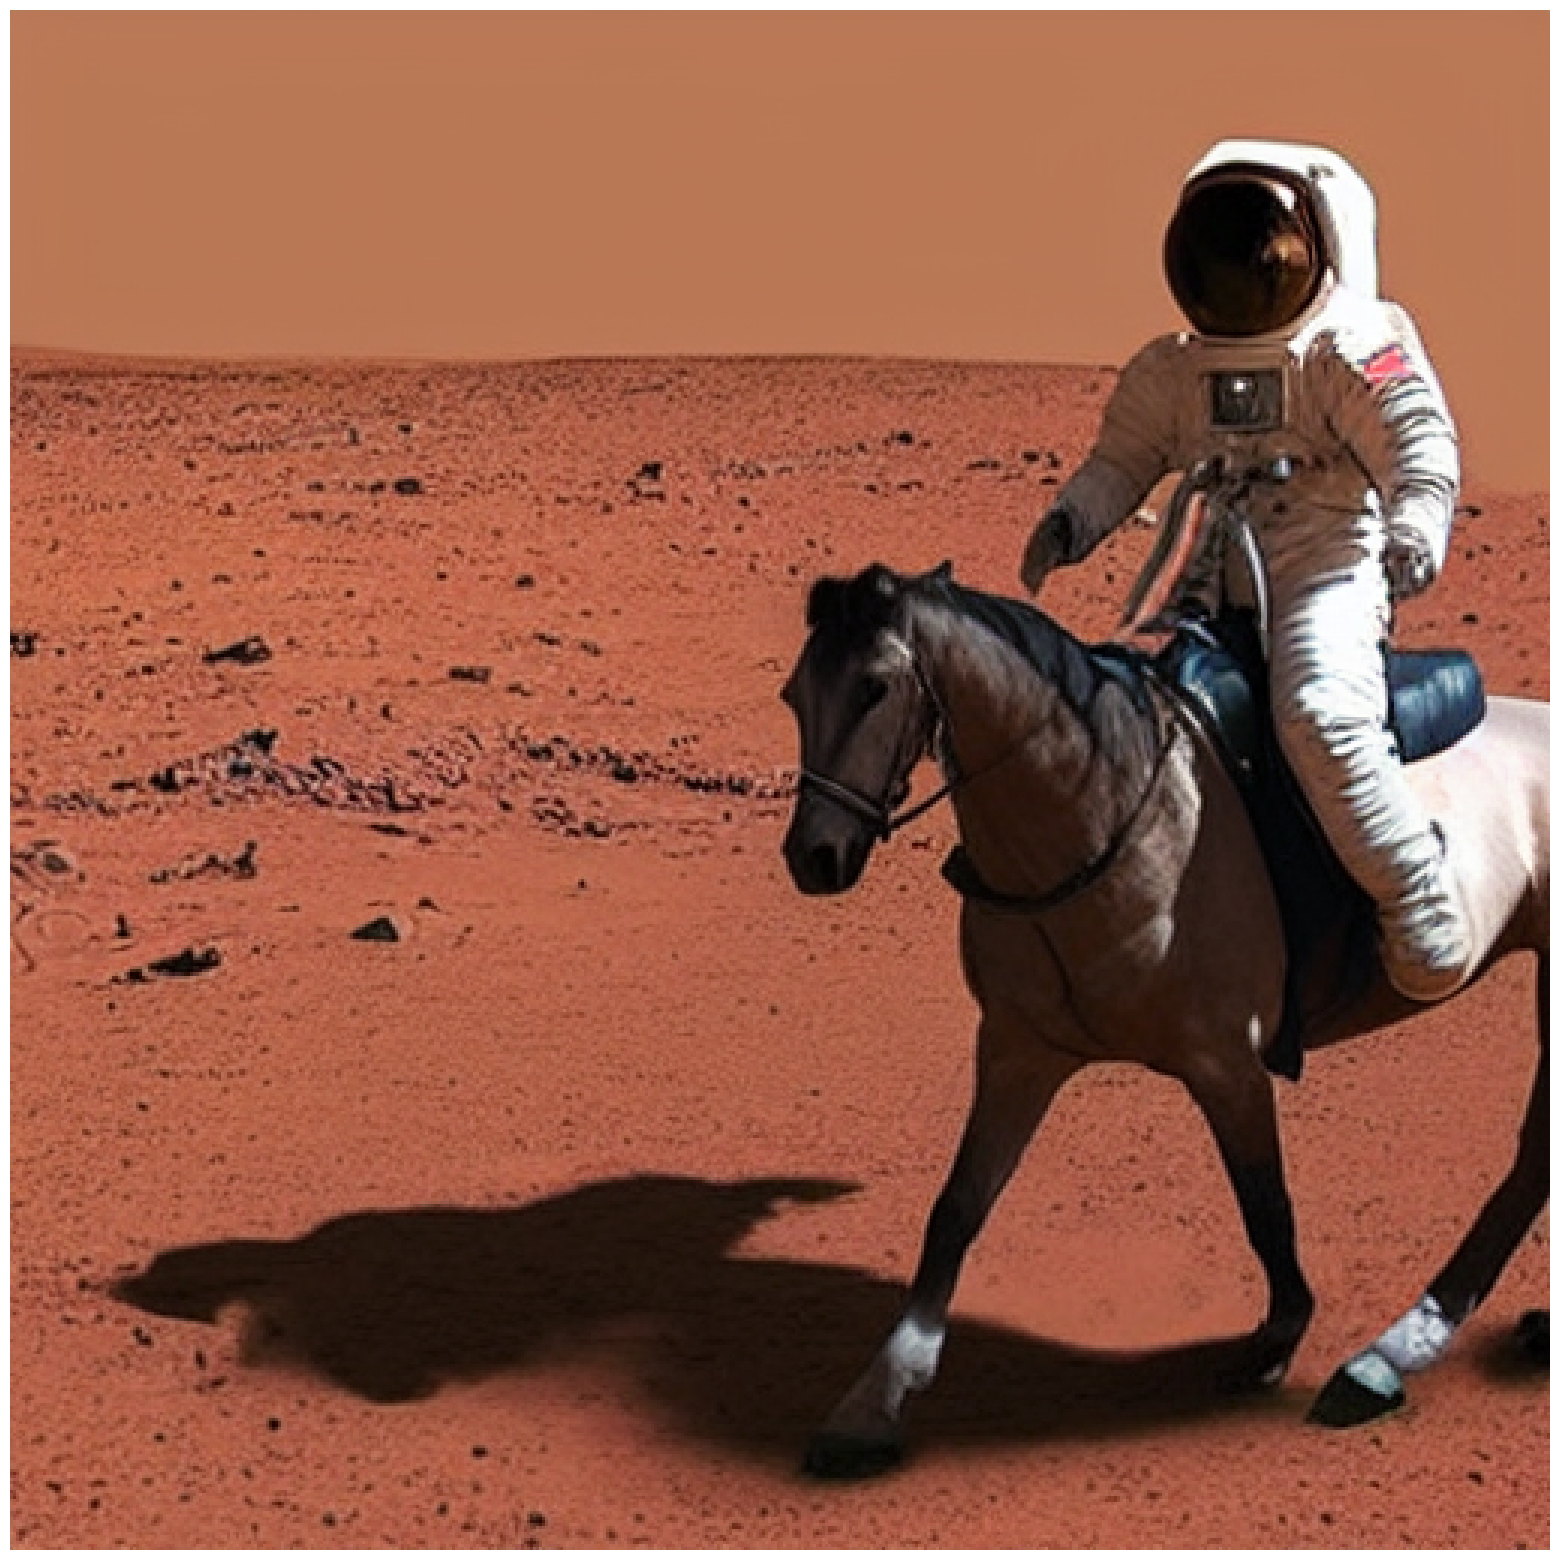

In [4]:
prompt = "a photo of an astronaut riding a horse on mars"

print("Start Warmup")
model.text_to_image(
    "warming up the model", batch_size=batch_size, num_steps=num_steps
)
# Start inference
print("Start running inference and generating images")
t = 0
for i in range(iterations):
    start_time = time.time()
    images = model.text_to_image(prompt=prompt, batch_size=batch_size)
    t+=(time.time() - start_time)
print(f"Standard FP32 precision: {(t/iterations):.2f} seconds")
benchmark_result.append(["Standard FP32 precision", t/iterations])
plot_images(images)

In [ ]:
precision = 'fp16'
use_xla = False
model = StableDiffusion(
    img_width=512,
    img_height=512,
    jit_compile=use_xla,
    precision=precision,
)

print("Start Warmup")
model.text_to_image(
    "warming up the model", batch_size=batch_size, num_steps=num_steps
)
# Start inference
print("Start running inference and generating images")
t = 0
for i in range(iterations):
    start_time = time.time()
    images = model.text_to_image(prompt=prompt, batch_size=batch_size)
    t+=(time.time() - start_time)
    
print(f"FP16 precision: {(t/iterations):.2f} seconds")
benchmark_result.append(["FP16 precision", t/iterations])

By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE
Start Warmup


2023-04-28 12:46:30.274608: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type XPU is enabled.
2023-04-28 12:46:59.507538: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type XPU is enabled.


In [ ]:
print("{:<20} {:<20}".format("Model", "Runtime"))
for result in benchmark_result:
    name, runtime = result
    print("{:<20} {:<20}".format(name, runtime))

In [3]:
import intel_extension_for_tensorflow as itex
precision = "BF16"
device = "gpu"
auto_mixed_precision_options = itex.AutoMixedPrecisionOptions()
if precision=="BF16":
    auto_mixed_precision_options.data_type = itex.BFLOAT16

graph_options = itex.GraphOptions(auto_mixed_precision_options=auto_mixed_precision_options)
# enable auto mixed precision.
graph_options.auto_mixed_precision = itex.ON

config = itex.ConfigProto(graph_options=graph_options)
# set GPU backend.

itex.set_backend(device, config)

print("Set itex for AMP (auto_mixed_precision, {}_FP32) with backend {}".format(precision, device))

Set itex for AMP (auto_mixed_precision, BF16_FP32) with backend gpu


In [4]:
iterations = 2
use_xla = False
batch_size = 1
num_steps = 50
prompt = "a photo of an astronaut riding a horse on mars"

model = StableDiffusion(
    img_width=512,
    img_height=512,
    jit_compile=use_xla,
)
print("Start Warmup")
model.text_to_image(
    "warming up the model", batch_size=batch_size, num_steps=num_steps
)
# Start inference
print("Start running inference and generating images")
t = 0
for i in range(iterations):
    start_time = time.time()
    images = model.text_to_image(prompt=prompt, batch_size=batch_size)
    t+=(time.time() - start_time)
print("Time taken ", t/iterations)

By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE
Start Warmup


2023-04-27 13:35:14.471928: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-27 13:35:14.473965: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform XPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-04-27 13:35:14.473987: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform XPU ID 1, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-04-27 13:35:14.474023: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


2023-04-27 13:35:36.805208: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type XPU is enabled.


50/50 [==============================] - 51s 321ms/step


2023-04-27 13:36:14.913375: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type XPU is enabled.


Start running inference and generating images
50/50 [==============================] - 16s 322ms/step
Time taken  16.38693356513977
